In [1]:
import pandas as pd

In [19]:
dataset = pd.read_excel('https://github.com/KeTaNK2/ANZ-Data-analytics/blob/master/Main.xlsx')

In [26]:
dataset=dataset.drop('Customer Id',axis=1)

In [27]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (90, 3)
Unseen Data For Predictions: (10, 3)


In [28]:
from pycaret.regression import *

In [29]:
exp_reg101 = setup(data = data, target = 'Salary', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(90, 3)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,5845.044800,59034709.625900,6918.755900,-0.357800,0.390500,0.338300
1,TheilSen Regressor,5917.964100,59586075.862800,6975.898300,-0.362200,0.397500,0.354100
2,Elastic Net,6034.353600,55500699.036400,6857.029800,-0.372300,0.400500,0.392900
3,Ridge Regression,6075.451200,56097589.657200,6892.704300,-0.380400,0.400400,0.392600
4,Orthogonal Matching Pursuit,6015.117400,55358607.562600,6861.575000,-0.383700,0.397300,0.384500
5,Linear Regression,6081.669200,56250423.473300,6903.320000,-0.385900,0.400700,0.392700
6,Lasso Regression,6081.698500,56249689.052200,6903.240600,-0.385900,0.400700,0.392700
7,Least Angle Regression,6081.669200,56250423.473300,6903.320000,-0.385900,0.400700,0.392700
8,Lasso Least Angle Regression,6081.741300,56245097.933200,6903.279600,-0.386100,0.400700,0.392700
9,Bayesian Ridge,5985.224500,55116625.471700,6848.778800,-0.400500,0.399400,0.387600


In [30]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7678.7226,8.590882e+07,9268.7009,-1.0195,0.5844,0.7105
1,5581.3623,4.186054e+07,6469.9725,-0.0071,0.4093,0.3820
2,5864.0406,4.506126e+07,6712.7687,-0.2639,0.3862,0.3802
3,2538.8282,1.070638e+07,3272.0610,0.4701,0.2269,0.1653
4,3287.4869,1.267523e+07,3560.2290,-1.9096,0.2132,0.2167
5,8504.9660,9.588774e+07,9792.2287,-0.1445,0.4061,0.3143
6,7611.8983,8.002335e+07,8945.5769,-0.3196,0.5013,0.5235
7,7270.7598,8.040338e+07,8966.7931,-0.1465,0.4689,0.4372
8,6705.0726,5.250615e+07,7246.1128,-0.6178,0.5036,0.6145
9,4128.0999,2.044248e+07,4521.3357,-1.7563,0.2972,0.3166


In [31]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10356.7636,1.766557e+08,13291.1893,-3.1528,0.7057,0.9217
1,5552.7100,4.716185e+07,6867.4486,-0.1346,0.3966,0.3196
2,6000.8592,7.403450e+07,8604.3303,-1.0766,0.4575,0.3695
3,3942.4872,1.889328e+07,4346.6406,0.0649,0.2669,0.2065
4,4643.9650,5.235789e+07,7235.8752,-11.0189,0.3451,0.3008
5,9585.5933,1.319945e+08,11488.8849,-0.5755,0.5740,0.3926
6,6674.3222,9.875763e+07,9937.6871,-0.6285,0.5746,0.4067
7,8871.5967,1.286543e+08,11342.5896,-0.8345,0.6616,0.4873
8,8160.5300,1.017276e+08,10086.0096,-2.1345,0.6037,0.7396
9,6545.0967,7.190572e+07,8479.7240,-8.6951,0.4580,0.4444


In [32]:
tuned_ada = tune_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7208.1757,7.891698e+07,8883.5231,-0.8552,0.5692,0.6738
1,4691.8461,3.501411e+07,5917.2722,0.1577,0.3616,0.3047
2,6102.1794,4.520743e+07,6723.6471,-0.2680,0.4026,0.4269
3,2484.8591,1.151170e+07,3392.8902,0.4302,0.2231,0.1683
4,2700.4169,1.129923e+07,3361.4327,-1.5938,0.1956,0.1807
5,9361.0754,1.189372e+08,10905.8325,-0.4197,0.4511,0.3313
6,7561.2522,8.062663e+07,8979.2330,-0.3295,0.5021,0.5077
7,6815.0301,6.428496e+07,8017.7903,0.0833,0.4256,0.4205
8,7489.5958,6.267112e+07,7916.5094,-0.9310,0.5395,0.6790
9,4777.1517,2.997973e+07,5475.3753,-3.0422,0.3409,0.3659


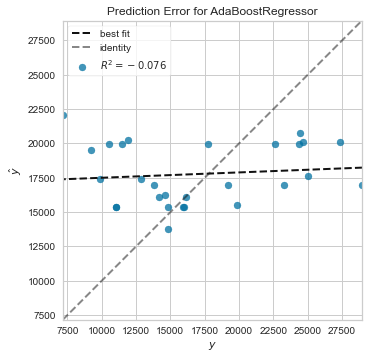

In [35]:
plot_model(tuned_ada, plot = 'error')

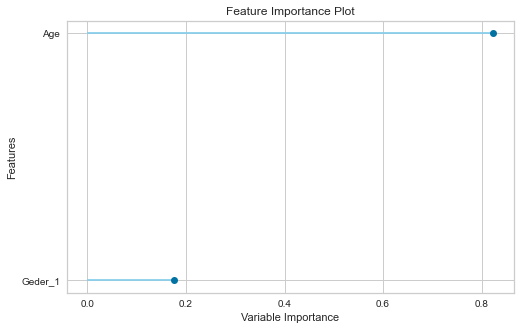

In [36]:
plot_model(tuned_ada, plot='feature')